<h1> Happy People Data Clean-Up and Analysis</h1>

<h2> Overall Ratings and Unemployment Rates </h2>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

import json

In [2]:
#import natl employment rate 2008-2018 (people over 16 years old)
unemploy_filepath=os.path.join('Resources','natl_unemploy_data.csv')
natl_unemploy=pd.read_csv(unemploy_filepath,index_col='Year')
natl_unemploy

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2008,5.0,4.9,5.1,5.0,5.4,5.6,5.8,6.1,6.1,6.5,6.8,7.3
2009,7.8,8.3,8.7,9.0,9.4,9.5,9.5,9.6,9.8,10.0,9.9,9.9
2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7


In [3]:
#calculate annual mean
natl_mean=natl_unemploy.mean(axis=1)
natl_mean

Year
2008    5.800000
2009    9.283333
2010    9.608333
2011    8.933333
2012    8.075000
2013    7.358333
2014    6.158333
2015    5.275000
2016    4.875000
2017    4.350000
2018    3.891667
dtype: float64

In [4]:
#import natl employment rate 2008-2018 for over 25 year olds with bachelors degrees
over25_filepath=os.path.join('Resources','over25_bs_unemploy_data.csv')
over25_unemploy=pd.read_csv(over25_filepath,index_col='Year')
over25_unemploy

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2008,2.1,2.0,2.1,2.1,2.2,2.4,2.5,2.8,2.6,3.1,3.2,3.6
2009,3.9,4.1,4.3,4.4,4.8,4.8,4.8,4.8,5.0,4.7,4.8,4.9
2010,4.9,4.9,4.9,4.8,4.6,4.4,4.5,4.6,4.5,4.6,5.0,4.8
2011,4.3,4.3,4.4,4.5,4.5,4.3,4.2,4.2,4.2,4.3,4.4,4.1
2012,4.3,4.2,4.1,4.0,3.9,4.0,4.1,4.1,4.0,3.7,3.9,4.0
2013,3.8,3.9,3.8,3.9,3.9,3.8,3.8,3.4,3.7,3.7,3.4,3.3
2014,3.3,3.4,3.4,3.3,3.2,3.3,3.1,3.2,2.9,3.0,3.2,2.8
2015,2.8,2.7,2.4,2.7,2.8,2.5,2.5,2.4,2.5,2.5,2.6,2.5
2016,2.5,2.5,2.6,2.4,2.5,2.5,2.5,2.6,2.5,2.6,2.4,2.5


In [5]:
#calculate over 25 mena
over25_mean=over25_unemploy.mean(axis=1)
over25_mean

Year
2008    2.558333
2009    4.608333
2010    4.708333
2011    4.308333
2012    4.025000
2013    3.700000
2014    3.175000
2015    2.575000
2016    2.508333
2017    2.300000
2018    2.125000
dtype: float64

In [6]:
#import review data
review_filepath=os.path.join('Resources','employee_reviews.csv')
reviews=pd.read_csv(review_filepath, index_col='index')
#deleting netflix from dataset to focus on "big 5" companies
reviews=reviews.loc[reviews['company']!='netflix']
reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
index,,,,,,,,,,,,,,,,
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [7]:
#listing indiv. companies
reviews['company'].unique()

array(['google', 'amazon', 'facebook', 'apple', 'microsoft'], dtype=object)

In [8]:
#splitting dates column into Month Day column and Year column
reviews['Date'], reviews['Year'] = reviews['dates'].str.split(',', 1).str
reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,Date,Year
index,,,,,,,,,,,,,,,,,,
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,Dec 11,2018
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...,Jun 21,2013
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...,May 10,2014
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...,Feb 8,2015
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...,Jul 19,2018


In [9]:
#deleting 3 rows that have 'incorrect year'
reviews=reviews[reviews['Year'] != ' 0000']
reviews.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link,Date,Year
index,,,,,,,,,,,,,,,,,,
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...,Dec 11,2018
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...,Jun 21,2013
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949,https://www.glassdoor.com/Reviews/Google-Revie...,May 10,2014
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498,https://www.glassdoor.com/Reviews/Google-Revie...,Feb 8,2015
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49,https://www.glassdoor.com/Reviews/Google-Revie...,Jul 19,2018


In [10]:
#changing year to numeric
pd.to_numeric(reviews['Year'])

index
1        2018.0
2        2013.0
3        2014.0
4        2015.0
5        2018.0
6        2018.0
7        2018.0
8        2018.0
9        2018.0
10       2018.0
11       2018.0
12       2018.0
13       2018.0
14       2018.0
15       2018.0
16       2018.0
17       2018.0
18       2018.0
19       2018.0
20       2018.0
21       2018.0
22       2018.0
23       2018.0
24       2018.0
25       2018.0
26       2018.0
27       2018.0
28       2018.0
29       2018.0
30       2018.0
          ...  
67500    2011.0
67501    2011.0
67502    2010.0
67503    2011.0
67504    2011.0
67505    2011.0
67506    2011.0
67507    2011.0
67508    2011.0
67509    2011.0
67510    2011.0
67511    2011.0
67512    2011.0
67513    2011.0
67514    2011.0
67515    2011.0
67516    2010.0
67517    2010.0
67518    2010.0
67519    2010.0
67520    2010.0
67521    2010.0
67522    2010.0
67523    2010.0
67524    2010.0
67525    2010.0
67526    2010.0
67527    2010.0
67528    2010.0
67529    2010.0
Name: Year, Length

In [11]:
#distilling down to most relevant columns
overall_reviews=reviews.loc[:, ('Year','overall-ratings','company')]
overall_reviews.head()

,Year,overall-ratings,company
index,,,
1,2018,5,google
2,2013,4,google
3,2014,5,google
4,2015,5,google
5,2018,5,google


In [12]:
by_year=overall_reviews.groupby(['Year']).mean()
by_year

,overall-ratings
Year,
2008,3.719392
2009,3.524376
2010,3.495822
2011,3.531138
2012,3.814662
2013,3.739348
2014,3.745278
2015,3.815265
2016,3.865240


In [13]:
#grouping reviews by company and year
group_reviews=overall_reviews.groupby(['company','Year']).mean()
group_reviews

overall-ratings
company   Year                  
amazon     2008         3.240909
           2009         3.279762
           2010         3.166667
           2011         2.996078
           2012         3.509058
           2013         3.375306
           2014         3.279715
           2015         3.360625
           2016         3.519608
           2017         3.711469
           2018         3.727092
apple      2008         3.865031
           2009         3.737624
           2010         3.705882
           2011         3.895013
           2012         3.912525
           2013         3.833536
           2014         3.905660
           2015         4.028327
           2016         3.990632
           2017         3.994100
           2018         3.975245
facebook   2008         4.142857
           2009         4.625000
           2010         4.696970
           2011         4.250000
           2012         4.842365
           2013         4.394737
           2014         4.477273
           2015         4.479821
           2016         4.472000
           2017         4.623457
           2018         4.283871
google     2008         4.010471
           2009         3.835821
           2010         3.731707
           2011         4.090909
           2012         4.238506
           2013         4.312073
           2014         4.350968
           2015         4.357039
           2016         4.432493
           2017         4.412081
           2018         4.383309
microsoft  2008         3.718039
           2009         3.364742
           2010         3.341772
           2011         3.370690
           2012         3.661489
           2013         3.690158
           2014         3.684499
           2015         3.843906
           2016         3.962833
           2017         4.032895
           2018         4.061490

In [14]:
#creating indivdual datasets for graphing
google_reviews=overall_reviews[overall_reviews['company'] == 'google']
google_mean=google_reviews.groupby(['Year']).mean()

apple_reviews=overall_reviews[overall_reviews['company'] == 'apple']
apple_mean=apple_reviews.groupby(['Year']).mean()

amazon_reviews=overall_reviews[overall_reviews['company'] == 'amazon']
amazon_mean=amazon_reviews.groupby(['Year']).mean()

facebook_reviews=overall_reviews[overall_reviews['company'] == 'facebook']
facebook_mean=facebook_reviews.groupby(['Year']).mean()

microsoft_reviews=overall_reviews[overall_reviews['company'] == 'microsoft']
microsoft_mean=microsoft_reviews.groupby(['Year']).mean()

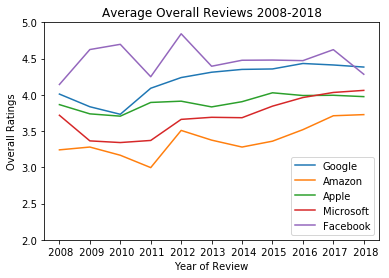

In [15]:
#graph all company reviews together
plt.plot(google_mean, label='Google')
plt.plot(amazon_mean, label='Amazon')
plt.plot(apple_mean, label='Apple')
plt.plot(microsoft_mean, label='Microsoft')
plt.plot(facebook_mean, label='Facebook')
plt.legend()
plt.yticks(np.arange(2, 5.5, step=0.5))
plt.ylabel('Overall Ratings')
plt.xlabel('Year of Review')
plt.title('Average Overall Reviews 2008-2018')
plt.savefig('indiv_company_reviews.png')

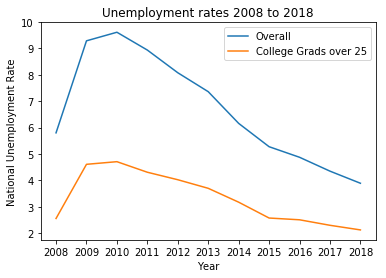

In [16]:
#graphing unemployment rates
plt.plot(natl_mean, label='Overall')
plt.plot(over25_mean, label='College Grads over 25')
plt.legend()
plt.title('Unemployment rates 2008 to 2018')
plt.xticks(np.arange(2008,2019, step=1))
plt.ylabel('National Unemployment Rate')
plt.xlabel('Year')
plt.savefig('unemployment_rates.png')

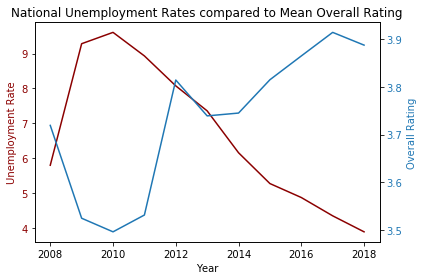

In [17]:
#graph overall mean rating compared to unemployment rates 
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
fig, ax1 = plt.subplots()

color = 'darkred'
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate', color=color)
ax1.plot(years,natl_mean, color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Overall Rating', color=color)  # we already handled the x-label with ax1
ax2.plot(years, by_year['overall-ratings'], color=color)
ax2.tick_params(axis='y',labelcolor=color)

plt.title('National Unemployment Rates compared to Mean Overall Rating')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Unemployment_rating_graph.png')
plt.show()


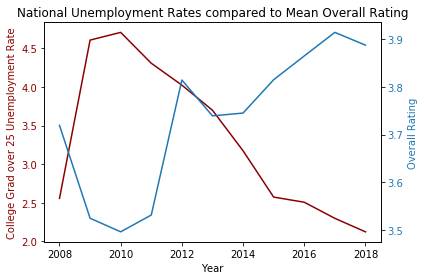

In [18]:
#graph overall mean rating compared to over 25 college grad unemployment rates 
years=[2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
fig, ax1 = plt.subplots()

color = 'darkred'
ax1.set_xlabel('Year')
ax1.set_ylabel('College Grad over 25 Unemployment Rate', color=color)
ax1.plot(years,over25_mean, color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Overall Rating', color=color)  # we already handled the x-label with ax1
ax2.plot(years, by_year['overall-ratings'], color=color)
ax2.tick_params(axis='y',labelcolor=color)

plt.title('National Unemployment Rates compared to Mean Overall Rating')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig('Unemployment_rating_graph.png')
plt.show()

In [19]:
#counting reviews by company and year
count_reviews=overall_reviews.groupby(['company','Year']).count()
count_reviews

overall-ratings
company   Year                  
amazon     2008              220
           2009              168
           2010              168
           2011              255
           2012              552
           2013              818
           2014             1405
           2015             3200
           2016             4386
           2017             7202
           2018             8054
apple      2008              326
           2009              202
           2010              238
           2011              381
           2012              503
           2013              823
           2014             1378
           2015             2224
           2016             2562
           2017             2373
           2018             1939
facebook   2008                7
           2009                8
           2010               33
           2011               24
           2012              203
           2013               76
           2014              132
           2015              223
           2016              250
           2017              324
           2018              310
google     2008              191
           2009              134
           2010              164
           2011              198
           2012              348
           2013              439
           2014              775
           2015             1378
           2016             1348
           2017             1490
           2018             1354
microsoft  2008              571
           2009              329
           2010              474
           2011              812
           2012             1545
           2013             1646
           2014             2187
           2015             3011
           2016             2852
           2017             2584
           2018             1919

In [20]:
#creating indivdual count datasets for graphing

google_count=google_reviews.groupby(['Year']).count()['overall-ratings']

apple_count=apple_reviews.groupby(['Year']).count()['overall-ratings']

amazon_count=amazon_reviews.groupby(['Year']).count()['overall-ratings']

facebook_count=facebook_reviews.groupby(['Year']).count()['overall-ratings']

microsoft_count=microsoft_reviews.groupby(['Year']).count()['overall-ratings']


In [21]:
facebook_count

Year
 2008      7
 2009      8
 2010     33
 2011     24
 2012    203
 2013     76
 2014    132
 2015    223
 2016    250
 2017    324
 2018    310
Name: overall-ratings, dtype: int64

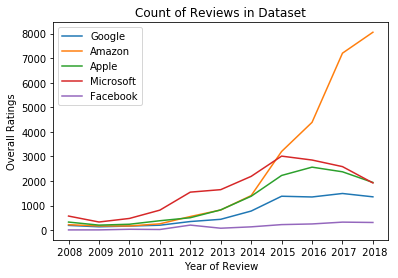

In [22]:
#graph all count company reviews together
plt.plot(google_count, label='Google')
plt.plot(amazon_count, label='Amazon')
plt.plot(apple_count, label='Apple')
plt.plot(microsoft_count, label='Microsoft')
plt.plot(facebook_count, label='Facebook')
plt.legend()

plt.ylabel('Overall Ratings')
plt.xlabel('Year of Review')
plt.title('Count of Reviews in Dataset')
plt.savefig('count_reviews.png')
plt.show()


<h2> Text Processing </h2>

In [23]:
# Dependencies
import os
import string

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

import pandas as pd
from matplotlib import pylab
import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud
from Resources.CustomFreqDist import CustomFreqDist


ModuleNotFoundError: No module named 'wordcloud'

In [4]:
# Import file
csv_data = pd.read_csv(os.path.join('.','Resources','employee_reviews.csv'))
df = pd.DataFrame(csv_data)

# Create company specific dataframes
google_df = df.loc[df['company']=='google',:]
microsoft_df = df.loc[df['company']=='microsoft',:]
amazon_df = df.loc[df['company']=='amazon',:]
apple_df = df.loc[df['company']=='apple',:]
facebook_df = df.loc[df['company']=='facebook',:]

In [5]:
# Checking to see if significant amounts of data is missing (all missing data are for Netflix)
microsoft = microsoft_df['company'].count()
amazon = amazon_df['company'].count()
apple = apple_df['company'].count()
facebook = facebook_df['company'].count()
google = google_df['company'].count()
print(microsoft+amazon+apple+facebook+google)
print(df['company'].count())

66719
67529


In [9]:
# Creates a stopwords set.
stop_words=set(stopwords.words("english"))
stopcaps = []
for word in stop_words:
    word = word.translate(str.maketrans(string.ascii_lowercase, string.ascii_uppercase))
    stopcaps.append(word)

In [20]:
# Define function for splitting reviews to text file.
def getreviews(import_df, company_name, prosorcons):
    holder_df = import_df
    if prosorcons == 'pros':
        with open(f'Resources/text_pros/{company_name}_pros.txt', 'w', encoding='UTF-8') as text:
            for index, row in holder_df.iterrows():
                text_holder = row['pros']
                text.write(text_holder+'\n')
        text.close()
    if prosorcons == 'cons':
        with open(f'Resources/text_cons/{company_name}_cons.txt', 'w', encoding='UTF-8') as text:
            for index, row in holder_df.iterrows():
                text_holder = row['cons']
                text.write(text_holder+'\n')
        text.close()
        
# Define function to clean text.
def cleantext(company_name, prosorcons):
    if prosorcons == 'pros':
        with open(f'Resources/text_{prosorcons}/{company_name}_{prosorcons}.txt', 'r', encoding='UTF-8') as pros:
            prostext = pros.read()
            proswords = prostext
            proswords = proswords.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
            proswords = proswords.translate(str.maketrans(string.digits, ' '*len(string.digits)))
            proswords = proswords.translate(str.maketrans(string.ascii_lowercase, string.ascii_uppercase))
            prostoken = nltk.word_tokenize(proswords)
        pros.close()
        
        filteredpros=[]
        for w in prostoken:
            if w not in stopcaps:
                filteredpros.append(w)
        prosdist = CustomFreqDist(filteredpros)
        
        return prosdist
    
    if prosorcons == 'cons':
        with open(f'Resources/text_{prosorcons}/{company_name}_{prosorcons}.txt', 'r', encoding='UTF-8') as cons:
            constext = cons.read()
            conswords = constext
            conswords = conswords.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
            conswords = conswords.translate(str.maketrans(string.digits, ' '*len(string.digits)))
            conswords = conswords.translate(str.maketrans(string.ascii_lowercase, string.ascii_uppercase))
            constoken = nltk.word_tokenize(conswords)
        cons.close()
        
        filteredcons=[]
        for w in constoken:
            if w not in stopcaps:
                filteredcons.append(w)
        consdist = CustomFreqDist(filteredcons)
        
        return consdist

# Define wordcloud function
def show_wc(company_name, prosorcons, title = None):
    if prosorcons == 'pros':
        with open(f'Resources/text_{prosorcons}/{company_name}_{prosorcons}.txt', 'r', encoding='UTF-8') as pros:
            prostext = pros.read()
            wordcloud = WordCloud(
                background_color='white',
                max_words=200,
                max_font_size=50, 
                scale=3,
                random_state=1
            ).generate(str(prostext))
            fig = plt.figure(1, figsize=(12, 12))
            plt.axis('off')
            if title:
                fig.suptitle(title, fontsize=20)
                fig.subplots_adjust(top=2.3)
            plt.imshow(wordcloud)
            #plt.show()
            return plt
    if prosorcons == 'cons':
        with open(f'Resources/text_{prosorcons}/{company_name}_{prosorcons}.txt', 'r', encoding='UTF-8') as cons:
            constext = cons.read()
            wordcloud = WordCloud(
                background_color='white',
                max_words=200,
                max_font_size=50, 
                scale=3,
                random_state=1
            ).generate(str(constext))
            fig = plt.figure(1, figsize=(12, 12))
            plt.axis('off')
            if title: 
                fig.suptitle(title, fontsize=20)
                fig.subplots_adjust(top=2.3)
            plt.imshow(wordcloud)
            #plt.show()
            return plt

In [13]:
# Grab reviews from each company_df
getreviews(google_df, 'google', 'pros')
getreviews(microsoft_df, 'microsoft', 'pros')
getreviews(amazon_df, 'amazon', 'pros')
getreviews(apple_df, 'apple', 'pros')
getreviews(facebook_df, 'facebook', 'pros')
getreviews(google_df, 'google', 'cons')
getreviews(microsoft_df, 'microsoft', 'cons')
getreviews(amazon_df, 'amazon', 'cons')
getreviews(apple_df, 'apple', 'cons')
getreviews(facebook_df, 'facebook', 'cons')

In [17]:
# Cleans text and returns a frequency distribution object.
google_pros = cleantext('google', 'pros')
microsoft_pros = cleantext('microsoft', 'pros')
amazon_pros = cleantext('amazon', 'pros')
facebook_pros = cleantext('facebook', 'pros')
apple_pros = cleantext('apple', 'pros')
google_cons = cleantext('google', 'cons')
microsoft_cons = cleantext('microsoft', 'cons')
amazon_cons = cleantext('amazon', 'cons')
facebook_cons = cleantext('facebook', 'cons')
apple_cons = cleantext('apple', 'cons')

In [18]:
# Plots word distributions and export images - PROS.
microsoft_pros_chart = microsoft_pros.custom_plot(30,title='Microsoft - Pros')
microsoft_pros_chart.savefig("Images/microsoft_pros_chart.png", bbox_inches="tight")
microsoft_pros_chart.clf()

google_pros_chart = google_pros.custom_plot(30,title='Google - Pros')
google_pros_chart.savefig("Images/google_pros_chart.png", bbox_inches="tight")
google_pros_chart.clf()

apple_pros_chart = apple_pros.custom_plot(30,title='Apple - Pros')
apple_pros_chart.savefig("Images/apple_pros_chart.png", bbox_inches="tight")
apple_pros_chart.clf()

amazon_pros_chart = amazon_pros.custom_plot(30,title='Amazon - Pros')
amazon_pros_chart.savefig("Images/amazon_pros_chart.png", bbox_inches="tight")
amazon_pros_chart.clf()

facebook_pros_chart = facebook_pros.custom_plot(30,title='Facebook - Pros')
facebook_pros_chart.savefig("Images/facebook_pros_chart.png", bbox_inches="tight")
facebook_pros_chart.clf()

# Plots word distributions and export images - CONS.
microsoft_cons_chart = microsoft_cons.custom_plot(30,title='Microsoft - Cons')
microsoft_cons_chart.savefig("Images/microsoft_cons_chart.png", bbox_inches="tight")
microsoft_cons_chart.clf()

google_cons_chart = google_cons.custom_plot(30,title='Google - Cons')
google_cons_chart.savefig("Images/google_cons_chart.png", bbox_inches="tight")
google_cons_chart.clf()

apple_cons_chart = apple_cons.custom_plot(30,title='Apple - Cons')
apple_cons_chart.savefig("Images/apple_cons_chart.png", bbox_inches="tight")
apple_cons_chart.clf()

amazon_cons_chart = amazon_cons.custom_plot(30,title='Amazon - Cons')
amazon_cons_chart.savefig("Images/amazon_cons_chart.png", bbox_inches="tight")
amazon_cons_chart.clf()

facebook_cons_chart = facebook_cons.custom_plot(30,title='Facebook - Cons')
facebook_cons_chart.savefig("Images/facebook_cons_chart.png", bbox_inches="tight")
facebook_cons_chart.clf()

<Figure size 432x288 with 0 Axes>

In [21]:
# Plots word clouds - PROS.
microsoft_pros_cloud = show_wc('microsoft', 'pros')
microsoft_pros_cloud.savefig("images/microsoft_pros_cloud.png")
microsoft_pros_cloud.clf()

google_pros_cloud = show_wc('google', 'pros')
google_pros_cloud.savefig("images/google_pros_cloud.png")
google_pros_cloud.clf()

amazon_pros_cloud = show_wc('amazon', 'pros')
amazon_pros_cloud.savefig("images/amazon_pros_cloud.png")
amazon_pros_cloud.clf()

apple_pros_cloud = show_wc('apple', 'pros')
apple_pros_cloud.savefig("images/apple_pros_cloud.png")
apple_pros_cloud.clf()

facebook_pros_cloud = show_wc('facebook', 'pros')
facebook_pros_cloud.savefig("images/facebook_pros_cloud.png")
facebook_pros_cloud.clf()

# Plots word clouds - CONS.
microsoft_cons_cloud = show_wc('microsoft', 'cons')
microsoft_cons_cloud.savefig("images/microsoft_cons_cloud.png")
microsoft_cons_cloud.clf()

google_cons_cloud = show_wc('google', 'cons')
google_cons_cloud.savefig("images/google_cons_cloud.png")
google_cons_cloud.clf()

amazon_cons_cloud = show_wc('amazon', 'cons')
amazon_cons_cloud.savefig("images/amazon_cons_cloud.png")
amazon_cons_cloud.clf()

apple_cons_cloud = show_wc('apple', 'cons')
apple_cons_cloud.savefig("images/apple_cons_cloud.png")
apple_cons_cloud.clf()

facebook_cons_cloud = show_wc('facebook', 'cons')
facebook_cons_cloud.savefig("images/facebook_cons_cloud.png")
facebook_cons_cloud.clf()

<Figure size 864x864 with 0 Axes>

<h2> Factors affecting Overall Rating </h2>

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from scipy.stats import linregress
import statsmodels.formula.api as sm1
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

employ_csv = "Resources/employee_reviews.csv"
ep = pd.read_csv(employ_csv)

In [2]:
ep.head(1)

,index,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [3]:
epp= pd.DataFrame({
    "overall": ep["overall-ratings"],
    "work_balance": ep["work-balance-stars"],
    "culture": ep["culture-values-stars"],
    "oppertunities": ep["carrer-opportunities-stars"],
    "management": ep["senior-mangemnet-stars"],
    "benefits": ep["comp-benefit-stars"]
})

# # epp.head()

# print(epp["culture"].count())
# print(epp["overall"].count())
# epp["culture"].value_counts()

# print(epp["overall"].value_counts())
# print(epp["culture"].value_counts())
# print(epp["work_balance"].value_counts())
# print(epp["oppertunities"].value_counts())
# print(epp["management"].value_counts())

# # print(epp.count())

In [4]:
epp= epp.replace("none", np.nan)


# print(epp["overall"].value_counts())
# print(epp["culture"].value_counts())
# print(epp["work_balance"].value_counts())
# print(epp["oppertunities"].value_counts())
# print(epp["management"].value_counts())
# print(epp[["overall", "culture", "work_balance", "oppertunities", "management"]].value_counts())


# print(epp["overall"].mean())
# print(epp["culture"].mean())
# print(epp["work_balance"].mean())
# print(epp["oppertunities"].mean())
# print(epp["management"].mean())


epp.count()

overall          67529
work_balance     60369
culture          53983
oppertunities    60421
management       59754
benefits         60368
dtype: int64

In [5]:
epp= epp.dropna(how="any")


In [6]:
#turining thes into lists
xx1= epp["culture"].tolist()
x1 =[float(n) for n in xx1]

xx2= epp["work_balance"].tolist()
x2 =[float(n) for n in xx2]

xx3= epp["oppertunities"].tolist()
x3 =[float(n) for n in xx3]

xx4= epp["management"].tolist()
x4 =[float(n) for n in xx4]

xx5= epp["benefits"].tolist()
x5 =[float(n) for n in xx4]

yy1= epp["overall"].tolist()
y1 =[float(b) for b in yy1]

lol = pd.DataFrame({
    "Culture": x1,
    "Work_Balance": x2,
    "Oppertunities": x3,
    "Management": x4,
    "Benefits": x5,
    "Overall": y1
})

In [7]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

X1 = lol[['Culture']] 
Y1 = lol['Overall']
 
# with sklearn
regr1 = linear_model.LinearRegression()
regr1.fit(X1, Y1)

print('Intercept: \n', regr1.intercept_)
print('Coefficients: \n', regr1.coef_)

# prediction with sklearn

# with statsmodels
X1 = sm.add_constant(X1) # adding a constant
 
model1 = sm.OLS(Y1, X1).fit()
predictions1 = model1.predict(X1) 
 
print_model1 = model1.summary()
print(print_model1)


Intercept: 
 1.2661971227256035
Coefficients: 
 [0.68048524]
                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                 7.215e+04
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:42:41   Log-Likelihood:                -60689.
No. Observations:               53222   AIC:                         1.214e+05
Df Residuals:                   53220   BIC:                         1.214e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [8]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

X2 = lol[['Culture','Work_Balance','Oppertunities', 'Management', 'Benefits']] 
Y2 = lol['Overall']
 
# with sklearn
regr2 = linear_model.LinearRegression()
regr2.fit(X2, Y2)

print('Intercept: \n', regr2.intercept_)
print('Coefficients: \n', regr2.coef_)

# prediction with sklearn
# New_Culture2 = 2
# New_Management2 = 4
# New_Oppertunities2= 2
# New_Work_Balance2= 5
# print ('Predicted Review: \n', regr2.predict([[New_Culture2 ,New_Management2, New_Oppertunities2, New_Work_Balance2]]))

# with statsmodels
X2 = sm.add_constant(X2) # adding a constant
 
model2 = sm.OLS(Y2, X2).fit()
predictions2 = model2.predict(X2) 
 
print_model2 = model2.summary()
print(print_model2)

Intercept: 
 0.6036808663162616
Coefficients: 
 [0.32700866 0.14223774 0.25577692 0.08821528 0.08821528]
                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                 3.205e+04
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:42:51   Log-Likelihood:                -50856.
No. Observations:               53222   AIC:                         1.017e+05
Df Residuals:                   53217   BIC:                         1.018e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [9]:
X1 = lol[['Culture']]
Y1 = lol['Overall']


# with sklearn
regr2 = linear_model.LinearRegression()
regr2.fit(X1, Y1)

print('Intercept: \n', regr1.intercept_)
print('Coefficients: \n', regr1.coef_)

# prediction with sklearn
# New_Culture = 2
# New_Management = 4
# New_Oppertunities= 2
# New_Work_Balance= 5
# print ('Predicted Review: \n', regr.predict([[New_Culture ,New_Management, New_Oppertunities, New_Work_Balance]]))

# with statsmodels
X1 = sm.add_constant(X1) # adding a constant
 
model2 = sm.OLS(Y1, X1).fit()
predictions2 = model1.predict(X1) 
 
print_model2 = model1.summary()
print(print_model1)

Intercept: 
 1.2661971227256035
Coefficients: 
 [0.68048524]
                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                 7.215e+04
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:42:41   Log-Likelihood:                -60689.
No. Observations:               53222   AIC:                         1.214e+05
Df Residuals:                   53220   BIC:                         1.214e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [10]:
# x_axis = epp["overall"]

# y_line = 0.6034+(x_axis*0.3270)+(x_axis * 0.1426)+(x_axis*0.2557)+(x_axis*0.1762) 
# # y_line = np.
# plt.plot(x_axis, y_line)

# plt.scatter(x_axis, epp["culture"], marker="o", facecolors="red", edgecolors="black",
#             s=10, alpha=0.75)
# plt.show()

<h2> How does Company Success affecting employee ratings </h2>

In [24]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

file_to_load= "../Project_1/Resources/employee_reviews.csv"
review_data= pd.read_csv(file_to_load)


In [25]:
review_data.head(1)

,index,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...


In [26]:
company_summary_df=review_data.groupby(["company"]).agg({"company":["count"],"overall-ratings":["mean","median"]}).reset_index()
company_summary_df.columns = ["Company" , "#_of_reviews", "avg_rating","median_rating"]
company_summary_df

,Company,#_of_reviews,avg_rating,median_rating
0,amazon,26430,3.587363,4
1,apple,12950,3.958224,4
2,facebook,1590,4.511950,5
3,google,7819,4.339430,5
4,microsoft,17930,3.816564,4
5,netflix,810,3.411111,4


In [27]:
def time_convert(time):
    #if type(time) != 'str':
         #return(time)
    try:
        conv_time = time.replace(",","").strip()
        new_time = datetime.datetime.strptime(conv_time, '%b %d %Y').date()
    except:
        new_time = (np.NaN)
    return(new_time)
    
review_data['dates'] = review_data['dates'].apply(time_convert)


In [28]:
# Rename columns for merge-ability
review_data=review_data.rename(columns={"dates":"Date"})
review_data=review_data.sort_values(by='Date')


In [29]:
amazon_df=(review_data[review_data['company']=='amazon']).dropna()
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'],format=None)

apple_df=(review_data[review_data['company']=='apple']).dropna()
apple_df['Date'] = pd.to_datetime(apple_df['Date'],format=None)

facebook_df=(review_data[review_data['company']=='facebook']).dropna()
facebook_df['Date'] = pd.to_datetime(facebook_df['Date'],format=None)

google_df=(review_data[review_data['company']=='google']).dropna()
google_df['Date'] = pd.to_datetime(google_df['Date'],format=None)

microsoft_df=(review_data[review_data['company']=='microsoft']).dropna()
microsoft_df['Date'] = pd.to_datetime(microsoft_df['Date'],format=None)

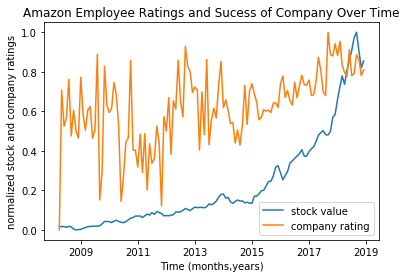

In [30]:
#Amazon stock data
AMZN_file= "../Project_1/worldtradingdata-history-AMZN.csv"
AMZN_df= pd.read_csv(AMZN_file)
AMZN_df['Date'] = pd.to_datetime(AMZN_df['Date'],format=None)

#merged data
Amazon_AMZN=pd.merge(amazon_df, AMZN_df, how='left', on ='Date')
Amazon_AMZN.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Amazon_AMZN=Amazon_AMZN.rename(columns={"Close":"Stock-at-close"})
(Amazon_AMZN.dropna())
#GB=Amazon_AMZN['Date'].groupby([(Amazon_AMZN['Date'].year),(Amazon_AMZN['Date'].month)]).mean()
amazon_month=Amazon_AMZN.Date.dt.to_period("M")
amazon_mean=(Amazon_AMZN.groupby(amazon_month)).mean()

amazon_mean['scaled-ratings']=(((amazon_mean['overall-ratings'])-(amazon_mean['overall-ratings'].min())))
amazon_mean['stocks-scaled']=(((amazon_mean['Stock-at-close'])-(amazon_mean['Stock-at-close'].min())))
amazon_mean['scaled-ratings'] = amazon_mean['scaled-ratings']/amazon_mean['scaled-ratings'].max()
amazon_mean['stocks-scaled'] = amazon_mean['stocks-scaled']/amazon_mean['stocks-scaled'].max()

amazon_star_x=amazon_mean.to_timestamp()
x=amazon_star_x.index.values
#plt.figure(figsize=(20,10))
plt.plot(x,amazon_mean['stocks-scaled'], label='stock value')
plt.plot(x, amazon_mean['scaled-ratings'], label='company rating')

plt.title('Amazon Employee Ratings and Sucess of Company Over Time')
plt.xlabel('Time (months,years)')
plt.ylabel('normalized stock and company ratings')
plt.legend()
plt.savefig('Amazon_graphed.png')
plt.show()

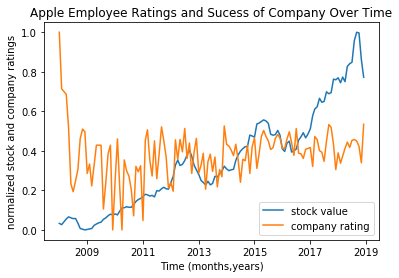

In [31]:
#Apple stock data
AAPL_file= "../Project_1/worldtradingdata-history-AAPL.csv"
AAPL_df= pd.read_csv(AAPL_file)
AAPL_df['Date'] = pd.to_datetime(AAPL_df['Date'],format=None)

#merged data
Apple_AAPL=pd.merge(apple_df, AAPL_df, how='left', on ='Date')
Apple_AAPL.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Apple_AAPL=Apple_AAPL.rename(columns={"Close":"Stock-at-close"})
(Apple_AAPL.dropna())

apple_month=Apple_AAPL.Date.dt.to_period("M")
apple_mean=(Apple_AAPL.groupby(apple_month)).mean()

apple_mean['scaled-ratings']=(((apple_mean['overall-ratings'])-(apple_mean['overall-ratings'].min())))
apple_mean['stocks-scaled']=(((apple_mean['Stock-at-close'])-(apple_mean['Stock-at-close'].min())))
apple_mean['scaled-ratings'] = apple_mean['scaled-ratings']/apple_mean['scaled-ratings'].max()
apple_mean['stocks-scaled'] = apple_mean['stocks-scaled']/apple_mean['stocks-scaled'].max()

apple_star_x=apple_mean.to_timestamp()
x=apple_star_x.index.values
plt.plot(x,apple_mean['stocks-scaled'],label='stock value')
plt.plot(x, apple_mean['scaled-ratings'],label='company rating')

plt.title('Apple Employee Ratings and Sucess of Company Over Time')
plt.xlabel('Time (months,years)')
plt.ylabel('normalized stock and company ratings')
plt.legend()
plt.savefig('Apple_graphed.png')
plt.show()

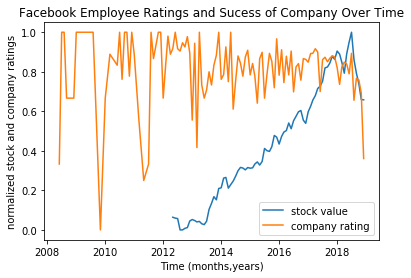

In [32]:
#FB stock data
FB_file= "../Project_1/worldtradingdata-history-FB.csv"
FB_df= pd.read_csv(FB_file)
FB_df['Date'] = pd.to_datetime(FB_df['Date'],format=None)

#merged data
Facebook_FB=pd.merge(facebook_df, FB_df, how='left', on ='Date')
Facebook_FB.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Facebook_FB=Facebook_FB.rename(columns={"Close":"Stock-at-close"})
(Facebook_FB.dropna())

facebook_month=Facebook_FB.Date.dt.to_period("M")
facebook_mean=(Facebook_FB.groupby(facebook_month)).mean()

facebook_mean['scaled-ratings']=(((facebook_mean['overall-ratings'])-(facebook_mean['overall-ratings'].min())))
facebook_mean['stocks-scaled']=(((facebook_mean['Stock-at-close'])-(facebook_mean['Stock-at-close'].min())))
facebook_mean['scaled-ratings'] = facebook_mean['scaled-ratings']/facebook_mean['scaled-ratings'].max()
facebook_mean['stocks-scaled'] = facebook_mean['stocks-scaled']/facebook_mean['stocks-scaled'].max()


facebook_star_x=facebook_mean.to_timestamp()
x=facebook_star_x.index.values

plt.plot(x,facebook_mean['stocks-scaled'],label='stock value')
plt.plot(x, facebook_mean['scaled-ratings'],label='company rating')

plt.title('Facebook Employee Ratings and Sucess of Company Over Time')
plt.xlabel('Time (months,years)')
plt.ylabel('normalized stock and company ratings')
plt.legend()
plt.savefig('Facebook_graphed.png')
plt.show()

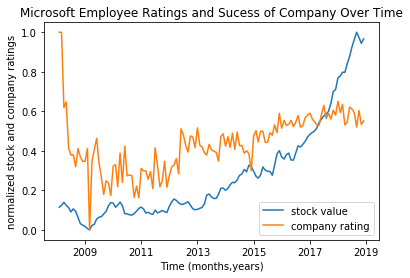

In [33]:
#Microsoft stock data
MSFT_file= "../Project_1/worldtradingdata-history-MSFT.csv"
MSFT_df= pd.read_csv(MSFT_file)
MSFT_df['Date'] = pd.to_datetime(MSFT_df['Date'],format=None)

#merged data
Microsoft_MSFT=pd.merge(microsoft_df, MSFT_df, how='left', on ='Date')
Microsoft_MSFT.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Microsoft_MSFT=Microsoft_MSFT.rename(columns={"Close":"Stock-at-close"})
(Microsoft_MSFT.dropna())


microsoft_month=Microsoft_MSFT.Date.dt.to_period("M")
microsoft_mean=(Microsoft_MSFT.groupby(microsoft_month)).mean()

microsoft_mean['scaled-ratings']=(((microsoft_mean['overall-ratings'])-(microsoft_mean['overall-ratings'].min())))
microsoft_mean['stocks-scaled']=(((microsoft_mean['Stock-at-close'])-(microsoft_mean['Stock-at-close'].min())))
microsoft_mean['scaled-ratings'] = microsoft_mean['scaled-ratings']/microsoft_mean['scaled-ratings'].max()
microsoft_mean['stocks-scaled'] = microsoft_mean['stocks-scaled']/microsoft_mean['stocks-scaled'].max()

microsoft_star_x=microsoft_mean.to_timestamp()
x=microsoft_star_x.index.values
plt.plot(x,microsoft_mean['stocks-scaled'],label='stock value')
plt.plot(x, microsoft_mean['scaled-ratings'],label='company rating')

plt.title('Microsoft Employee Ratings and Sucess of Company Over Time')
plt.xlabel('Time (months,years)')
plt.ylabel('normalized stock and company ratings')
plt.legend()
plt.savefig('Microsoft_graphed.png')
plt.show()

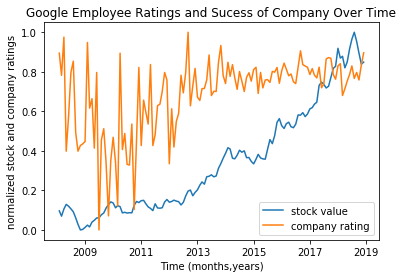

In [34]:
#Google stock data
GOOG_file= "../Project_1/worldtradingdata-history-GOOG.csv"
GOOG_df= pd.read_csv(GOOG_file)
GOOG_df['Date'] = pd.to_datetime(GOOG_df['Date'],format=None)

#merged data
Google_GOOG=pd.merge(google_df, GOOG_df, how='left', on ='Date')
Google_GOOG.drop(['job-title','summary','location','pros','cons','advice-to-mgmt','work-balance-stars',
                  'culture-values-stars','carrer-opportunities-stars','comp-benefit-stars',
                  'senior-mangemnet-stars','helpful-count','link','Open','High','Low','Volume'], axis=1, inplace=True)
Google_GOOG=Google_GOOG.rename(columns={"Close":"Stock-at-close"})
Google_GOOG.dropna()
g_month=Google_GOOG.Date.dt.to_period("M")
google_mean=(Google_GOOG.groupby(g_month)).mean()

google_mean['scaled-ratings']=(((google_mean['overall-ratings'])-(google_mean['overall-ratings'].min())))
google_mean['stocks-scaled']=(((google_mean['Stock-at-close'])-(google_mean['Stock-at-close'].min())))
google_mean['scaled-ratings'] = google_mean['scaled-ratings']/google_mean['scaled-ratings'].max()
google_mean['stocks-scaled'] = google_mean['stocks-scaled']/google_mean['stocks-scaled'].max()

google_star_x=google_mean.to_timestamp()
x=google_star_x.index.values

plt.plot(x,google_mean['stocks-scaled'],label='stock value')
plt.plot(x, google_mean['scaled-ratings'],label='company rating')

plt.title('Google Employee Ratings and Sucess of Company Over Time')
plt.xlabel('Time (months,years)')
plt.ylabel('normalized stock and company ratings')
plt.legend()
plt.savefig('Google_graphed.png')
plt.show()